In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
events = pd.read_csv('./events2015')

In [3]:
del events['iyear']

In [4]:
events.tail()

,country_txt,cnt
94,United States,38
95,Uzbekistan,1
96,Venezuela,3
97,West Bank and Gaza Strip,246
98,Yemen,664


In [5]:
events.shape[0]

99

In [6]:
cc = pd.read_csv('CountryCode.csv', sep=';')

In [7]:
cc.head()

,Name,CountryCode
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [8]:
cc.shape[0]

249

In [9]:
to_plot = cc.merge(events, left_on='Name', right_on='country_txt', how='left')

In [10]:
to_plot.head()

,Name,CountryCode,country_txt,cnt
0,Afghanistan,AFG,Afghanistan,1928.0
1,Albania,ALB,Albania,4.0
2,Algeria,DZA,Algeria,16.0
3,American Samoa,ASM,NaN,NaN
4,Andorra,AND,NaN,NaN


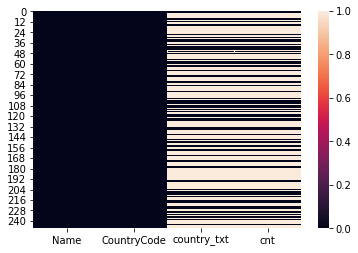

In [11]:
from seaborn import heatmap
heatmap(to_plot.isnull())

In [12]:
to_plot.head()

,Name,CountryCode,country_txt,cnt
0,Afghanistan,AFG,Afghanistan,1928.0
1,Albania,ALB,Albania,4.0
2,Algeria,DZA,Algeria,16.0
3,American Samoa,ASM,NaN,NaN
4,Andorra,AND,NaN,NaN


In [13]:
del to_plot['Name']
del to_plot['country_txt']

In [14]:
to_plot = to_plot.fillna(0)

In [15]:
import folium

country_geo = 'world-countries.json'

# Setup a folium map at a high-level zoom

map = folium.Map(location=[53, 9], zoom_start=1.8)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations

folium.Choropleth(geo_data=country_geo, data=to_plot,
columns=['CountryCode','cnt'],
key_on='feature.id',
fill_opacity=0.7, line_opacity=0.5,
fill_color='YlOrRd',
legend_name='Events',
bins = 9).add_to(map)
map.save('plot_data3.html')
# Import the Folium interactive html file
from IPython.display import IFrame
IFrame('plot_data3.html', width=800, height=650)